In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [2]:
#1.	Load the breast cancer Wisconsin dataset from CSV file.
breast_cancer_Wisconsin =pd.read_csv('data.csv')
print(breast_cancer_Wisconsin.info())
#breast_cancer_Wisconsin.tail(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
#Encode the target column (M=1, B=0)
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder().fit(breast_cancer_Wisconsin['diagnosis'])
breast_cancer_Wisconsin['diagnosis'] = encoder.transform(breast_cancer_Wisconsin['diagnosis'])

print(breast_cancer_Wisconsin.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

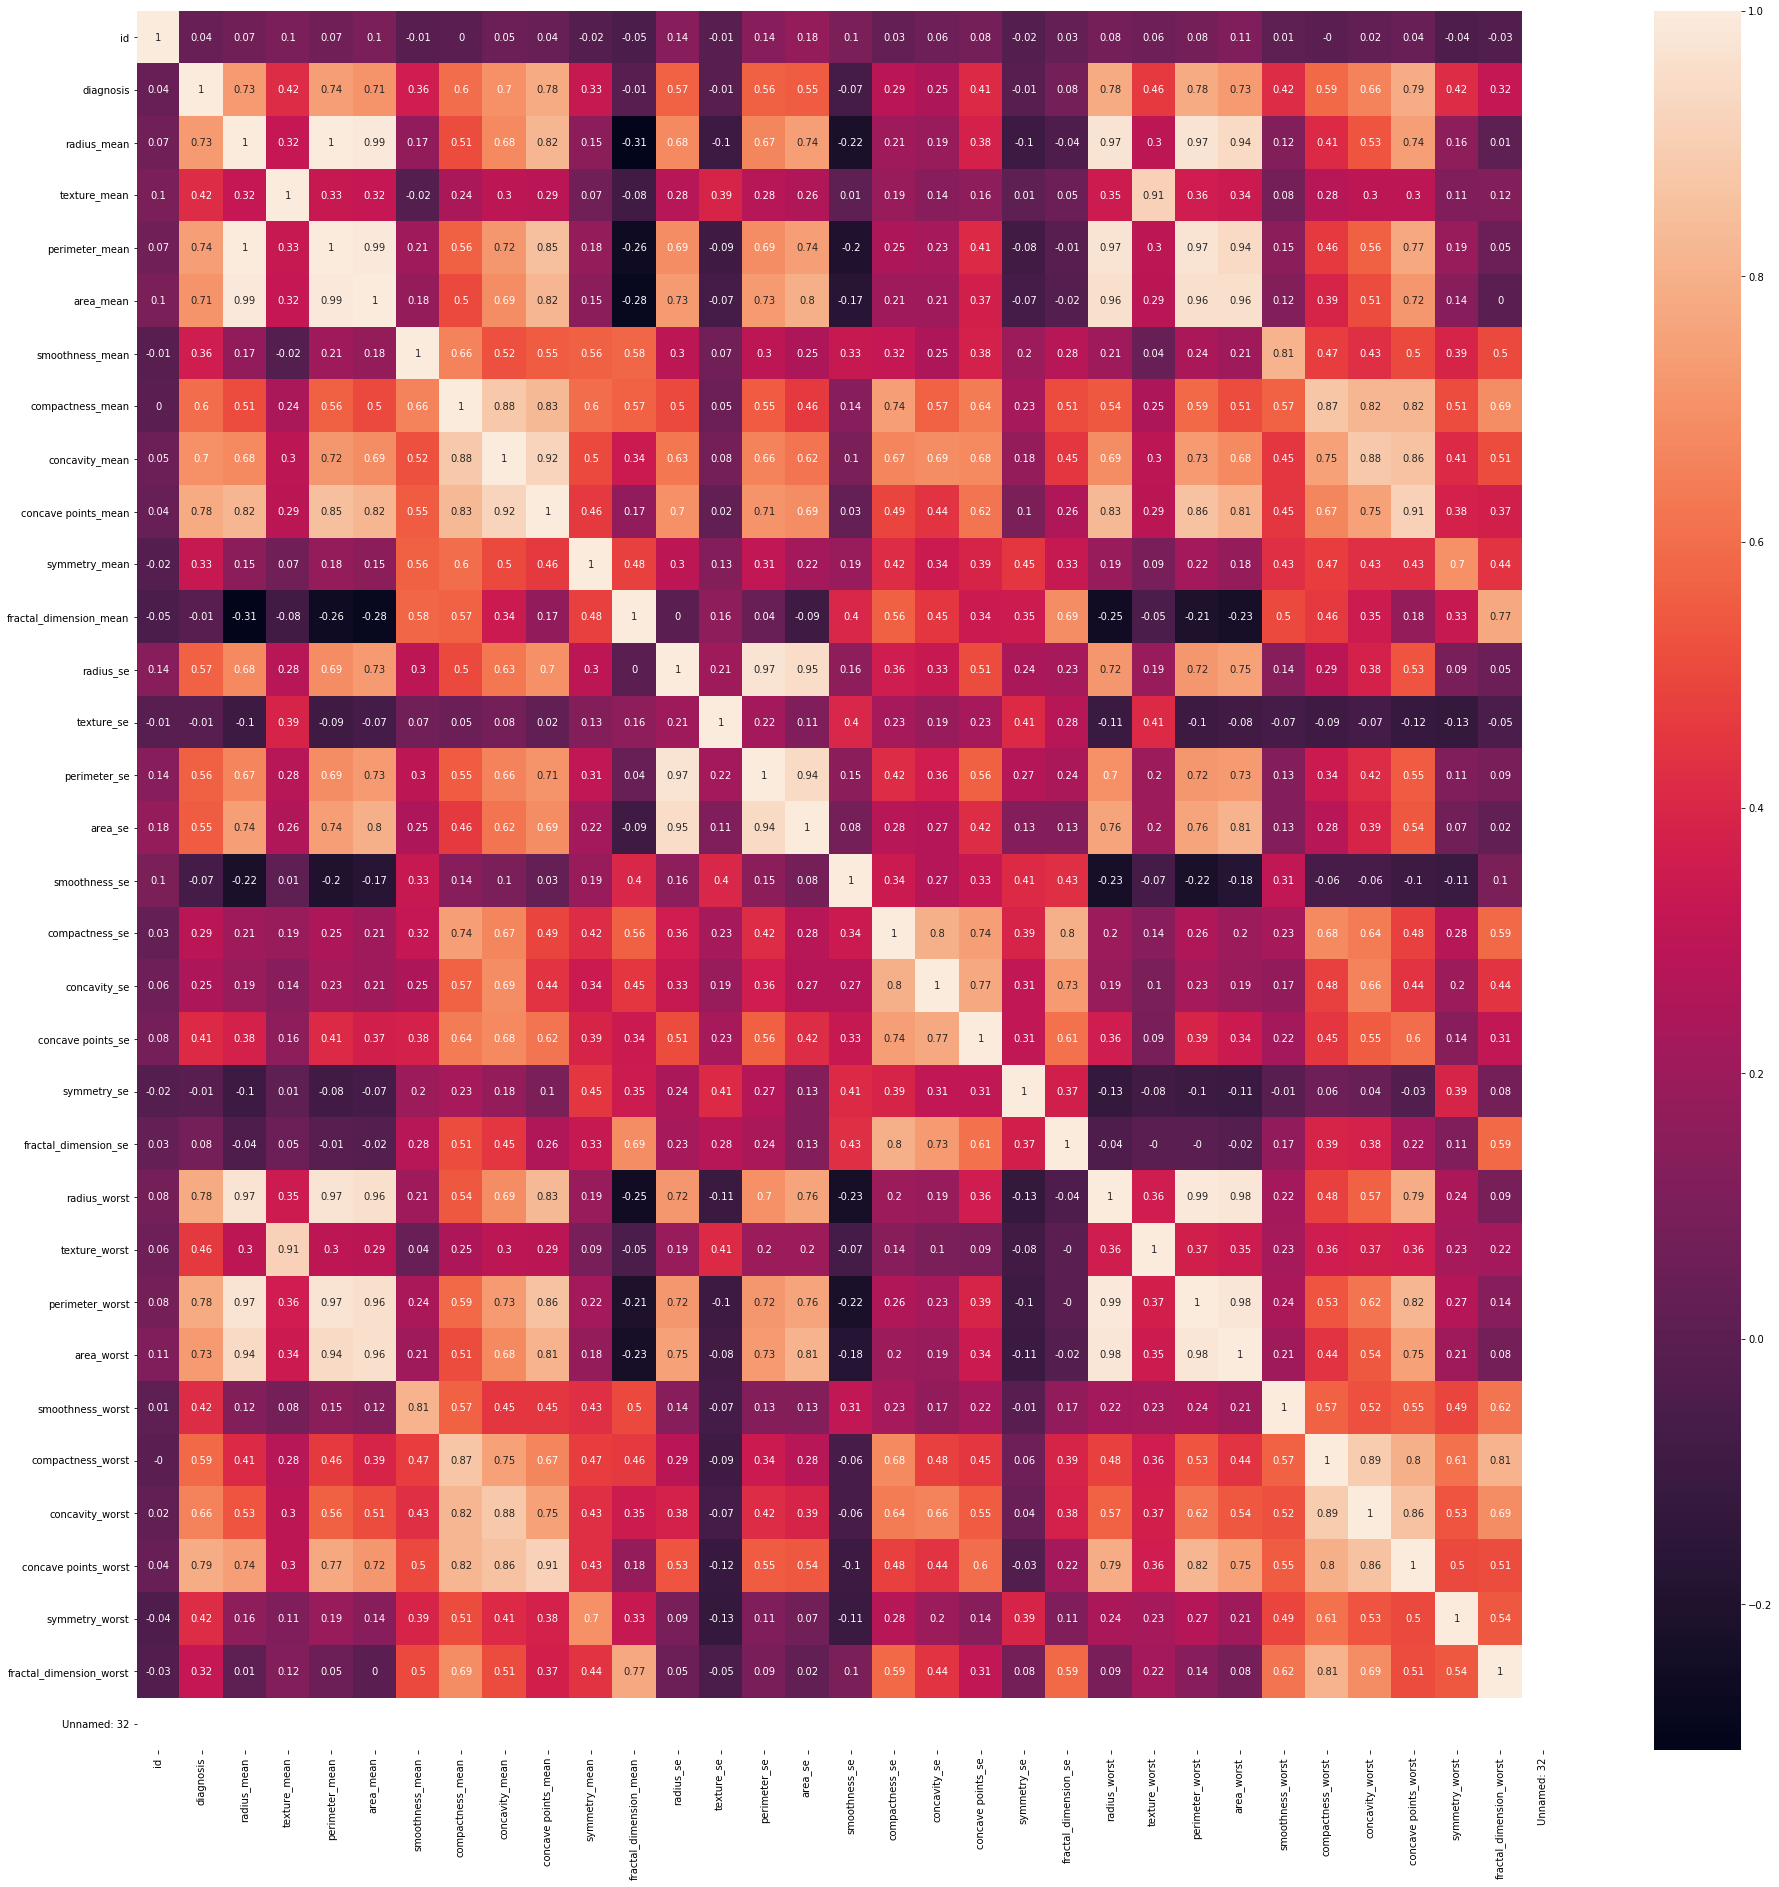

In [4]:
import seaborn as sns

plt.figure(figsize= (32, 32))
sns.heatmap(breast_cancer_Wisconsin.corr().round(2),annot=True)
plt.show()



In [5]:
y=breast_cancer_Wisconsin["diagnosis"]
x=breast_cancer_Wisconsin.iloc[:, 2:32]
#Based on heatmap above, drop irrelevant features that have a lower impact on diagnosis variable
#: symmetry_se , fractal_dimension_se,texture_se, smoothness_se,id,fractal_dimension_mean,smoothness_se
#print(x)
x= x.drop(['fractal_dimension_se','fractal_dimension_mean' ,'symmetry_se', 'texture_se','smoothness_se'], axis='columns')
#print(x)
#data scaling to ensure that all of the data-values lie on a common range and avoid extremes values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
#2.	Divided the dataset randomly into testing and training with a splitting ration of (70:30). [:-1]

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=1)

In [7]:
#3.	Train the algorithms.
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
y_train=np.array(y_train)
y_test=np.array(y_test)
pca = PCA(n_components = 2)
#The data is reduced from multi-dimensional data to two-dimensional data by using PCA.
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)
#print(X_test2D)
#---------------------------------------First classifier---------------------------------------------------------
#---------------------------------------Logistic Regression without reducing the data dimensional---------------------------------------------------------
# Fitting Logistic Regression to the Training set 
LOR_classifier_1 = LogisticRegression() 
LOR_classifier_1.fit(X_train, y_train)
# Predicting the Test set results  
y_pred_LOR_1 = LOR_classifier_1.predict(X_test) 
#---------------------------------------Logistic Regression with reducing the data dimensional---------------------------------------------------------
LOR_classifier_2 = LogisticRegression() 
LOR_classifier_2.fit(X_train2D, y_train)
# Predicting the Test set results  
y_pred_LOR_2 = LOR_classifier_2.predict(X_test2D)  
#---------------------------------------second classifier---------------------------------------------------------

#---------------------------------------SVC without reducing the data dimensional---------------------------------------------------------

# a SVC classifier without reducing the data dimensional( from multi-dimensional to two-dimensional ) 
SVM_classifier_1=SVC(C=10 ,kernel ='linear' , degree=3 , gamma =0.001, random_state=1)
# Thrain the classifier 
SVM_classifier_1.fit(X_train,y_train) 
# Predicting the Test set results  
y_predsvm_1 = SVM_classifier_1.predict(X_test)
#---------------------------------------SVC with reducing the data dimensional---------------------------------------------------------
#a SVC classifier 
SVM_classifier_2=SVC(C=10 ,kernel ='linear' , degree=3 , gamma =0.001, random_state=1)
# Thrain the classifier 
SVM_classifier_2.fit(X_train2D,y_train) 
# Predicting the Test set results 
y_predsvm_2 = SVM_classifier_2.predict(X_test2D) 


In [8]:
#4.	Use grid search to find the best hyperparameters for the SVM model.
from sklearn.model_selection import GridSearchCV 
from sklearn import svm 

def svc_param_selection(X, y, nfolds): 
  Cs= [0.001, 0.01,0.1,1,10]
  gammas= [0.001, 0.01,0.1,1]
  param_grid= {'C':Cs , 'gamma' : gammas}
  grid_search= GridSearchCV(svm.SVC(kernel='linear'), param_grid , cv=nfolds ) 
  grid_search.fit(X, y) 
  grid_search.best_params_
  return grid_search.best_params_

print(svc_param_selection(X_train2D, y_train, 3))

{'C': 1, 'gamma': 0.001}


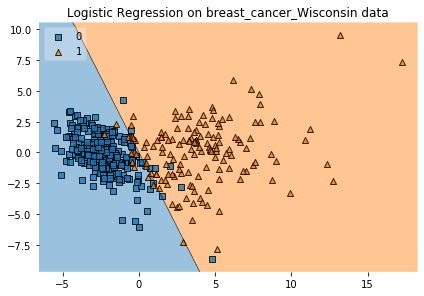

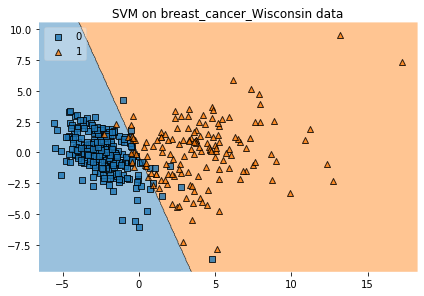

In [9]:
#5.	Plot the two classes in different colors, along with the decision boundary for each classifier. 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Visualize the decision boundaries for the Logistic Regression model
plot_decision_regions(X_train2D , y_train, clf=LOR_classifier_2, legend=2) 
plt.tight_layout() 
plt.title('Logistic Regression on breast_cancer_Wisconsin data')
#plt.legend(['1=M = malignant', '0=B = benign'])
plt.show()

# Visualize the decision boundaries for the SVM model
plot_decision_regions(X_train2D , y_train, clf=SVM_classifier_2, legend=2) 
plt.tight_layout() 
plt.title('SVM on breast_cancer_Wisconsin data')
#plt.legend(['1=M = malignant', '0=B = benign'])
plt.show()

In [10]:
#6.	Report the results of each classifier. Which classifier performed better? Why?

print('Accuracy of Logistic Regression model on training set "without reducing the data dimensional": {:.2f}'.format(LOR_classifier_1.score(X_train,y_train)*100))
print('Accuracy of Logistic Regression model on test set "without reducing the data dimensional": {:.2f}'.format(LOR_classifier_1.score(X_test,y_test)*100))

print('Accuracy of Logistic Regression model on training set "with reducing the data dimensional": {:.2f}'.format(LOR_classifier_2.score(X_train2D,y_train)*100))
print('Accuracy of Logistic Regression model on test set "with reducing the data dimensional": {:.2f}'.format(LOR_classifier_2.score(X_test2D,y_test)*100))

print('Accuracy of SVC on training set "without reducing the data dimensional": {:.2f}'.format(SVM_classifier_1.score(X_train,y_train)*100))
print('Accuracy of SVC on test set "without reducing the data dimensional": {:.2f}'.format(SVM_classifier_1.score(X_test,y_test)*100))

print('Accuracy of SVC on training set "with reducing the data dimensional": {:.2f}'.format(SVM_classifier_2.score(X_train2D,y_train)*100))
print('Accuracy of SVC on test set "with reducing the data dimensional": {:.2f}'.format(SVM_classifier_2.score(X_test2D,y_test)*100))



Accuracy of Logistic Regression model on training set "without reducing the data dimensional": 98.99
Accuracy of Logistic Regression model on test set "without reducing the data dimensional": 98.25
Accuracy of Logistic Regression model on training set "with reducing the data dimensional": 94.72
Accuracy of Logistic Regression model on test set "with reducing the data dimensional": 85.38
Accuracy of SVC on training set "without reducing the data dimensional": 98.99
Accuracy of SVC on test set "without reducing the data dimensional": 96.49
Accuracy of SVC on training set "with reducing the data dimensional": 95.23
Accuracy of SVC on test set "with reducing the data dimensional": 84.80


In [11]:
# print classification report 
print('classification report of  Logistic Regression model : \n{}'.format(classification_report(y_test, y_pred_LOR_1)))

print('classification report of  Logistic Regression model "with reducing the data dimensional":\n {}'.format(classification_report(y_test, y_pred_LOR_2)))


classification report of  Logistic Regression model : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

classification report of  Logistic Regression model "with reducing the data dimensional":
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       108
           1       0.80      0.81      0.80        63

    accuracy                           0.85       171
   macro avg       0.84      0.84      0.84       171
weighted avg       0.85      0.85      0.85       171



In [12]:
print('classification report of SVC model : \n{}'.format(classification_report(y_test, y_predsvm_1)))

print('classification report of SVC model "with reducing the data dimensional":\n {}'.format(classification_report(y_test, y_predsvm_2)))


classification report of SVC model : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

classification report of SVC model "with reducing the data dimensional":
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       108
           1       0.78      0.83      0.80        63

    accuracy                           0.85       171
   macro avg       0.84      0.84      0.84       171
weighted avg       0.85      0.85      0.85       171



In [13]:
#Which classifier performed better? Why?
#Based on the results above, the Logistic Regression model is worked slightly better than the SVM model.
#Also, the performances of the two models decreased when reducing the data dimensional by using PCA.